# <span style='font-family:"Times New Roman"'> <span styel=''>**HOTSPOT ANALYSIS**
*Emile Cohen*
    
 *June 2020*

**Goal:** In this notebook, we want to see if the Genome Instability differences we have spot are still present when splitting on the tp53 mutation hotspot. For that, we create different groups to compare GI differences.

---

In [84]:
%run -i '../../../utils/setup_environment.ipy'

import warnings
warnings.filterwarnings('ignore')
from cancer_utils import *
from scipy.stats import fisher_exact, ranksums, chi2, norm
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.gridspec as gridspec

data_path = '../../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

In [183]:
def boxplot_sampletype(df: pd.DataFrame, group:str, palette, order, metrics: str, figsize= (10,3), title: str = '', title_font: int=12, xlim=[0,1]):
    fig=plt.figure(figsize=figsize)
    ax = plt.subplot2grid(shape=(2,1), loc=(0,0), colspan=1)

    sns.boxplot(y=metrics, x=group,data=df,ax=ax, dodge=False,order=order, palette=palette).set_title(title, weight='bold', fontsize=title_font)
    
    groupby_ = get_groupby(df,group, 'count')
    
    labels = []
    for element in order:
        labels.append(element + '\n('+ str(groupby_.loc[element].values[0])+')')
    
    
    
    ax.set_xticklabels(labels)
    style(ax)
    ax.set_ylim(xlim)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    return fig, ax


# Let's give a look at medians and statistics

def get_statistics(df: pd.DataFrame, group:str, metrics: str, group_list: list):
    group_1 = df[df[group] == group_list[0]][metrics]
    group_2 = df[df[group] == group_list[1]][metrics]

    median_1 = group_1.median()
    median_2 = group_2.median()

    statistic, p_value = ranksums(group_1.dropna().values,group_2.dropna().values)
    
    results = [['', 'size', metrics],
               [group_list[0], group_1.shape[0], median_1],
               [group_list[1], group_2.shape[0], median_2],
               ['', 'Statistics', 'p-value'],
               ['', statistic, p_value]]


    return pd.DataFrame(results)



def get_hotspot_frac(df: pd.DataFrame, group_type:str = None, group: list = None, nb = 10):
    if group_type and group:
        df = df[df[group_type].isin(group)]
    result = [['spot', '#', 'frac']]
    for spot in get_groupby(df, 'tp53_spot_1', 'count').sort_values(by='count', ascending=False).head(nb).index.tolist():
        result.append([spot,df[df['tp53_spot_1'] == spot].frac_genome_altered.shape[0], df[df['tp53_spot_1'] == spot].frac_genome_altered.median()])

    return pd.DataFrame(result)

In [367]:
# Create the palette for the mutation types
mutation_list = ['in_frame','truncated', 'missense', '248', '273', '175', 'hotspot']

acc = list(sns.color_palette("Accent"))
mutation_palette_lits = acc[:7]

mutation_palette = {'in_frame':acc[0],'truncated':acc[1], 'missense':acc[2], '248':acc[4], '273':acc[5], '175':acc[6], 'hotspot':acc[7]}



# Group Creation 

## Master loading
We only consider samples with exactly one mutation to simplify the analysis in this first pass

In [308]:
master = non_wgd_load_and_cut(data_path + 'impact-facets-tp53/processed/no_wgd/master_no_wgd.pkl')
# We only take samples with exactly one mutatiomn
master = master[master['tp53_count'] ==1]

In [309]:
get_hotspot_frac(df=master,
                group_type=None,
                group=None)

,0,1,2
0,spot,#,frac
1,nan,317,0.33
2,273,304,0.277
3,248,290,0.294
4,175,215,0.322
5,245,131,0.32
6,282,127,0.306
7,213,95,0.301
8,220,75,0.317
9,342,70,0.32


In [310]:
wt = get_hotspot_frac(df=master,
                group_type='tp53_group',
                group=['1_WILD_TYPE'])

cnloh = get_hotspot_frac(df=master,
                group_type='tp53_group',
                group=['>=1_cnLOH'])

loss = get_hotspot_frac(df=master,
                group_type='tp53_group',
                group=['>=1_LOSS'])

display_side_by_side(wt, cnloh, loss)

,0,1,2
0,spot,#,frac
1,273,45,0.106
2,248,43,0.237
3,175,25,0.143
4,nan,22,0.201
5,245,18,0.189
6,213,17,0.086
7,181,10,0.159
8,282,10,0.193
9,342,8,0.186


Here, we understand that the hotspot 273 is the less unstable. It is very interesting to see it in the 1_WT subgroup

In [311]:
get_groupby(master,'tp53_vc_group_1', 'count').sort_values(by='count', ascending=False)

,count
tp53_vc_group_1,
missense,1791
truncated,1524
hotspot,349
273,302
248,290
175,214
in_frame,130


# Group Comparison

## All cohort

,count
tp53_vc_group_1,
missense,1791
truncated,1524
hotspot,349
273,302
248,290
175,214
in_frame,130


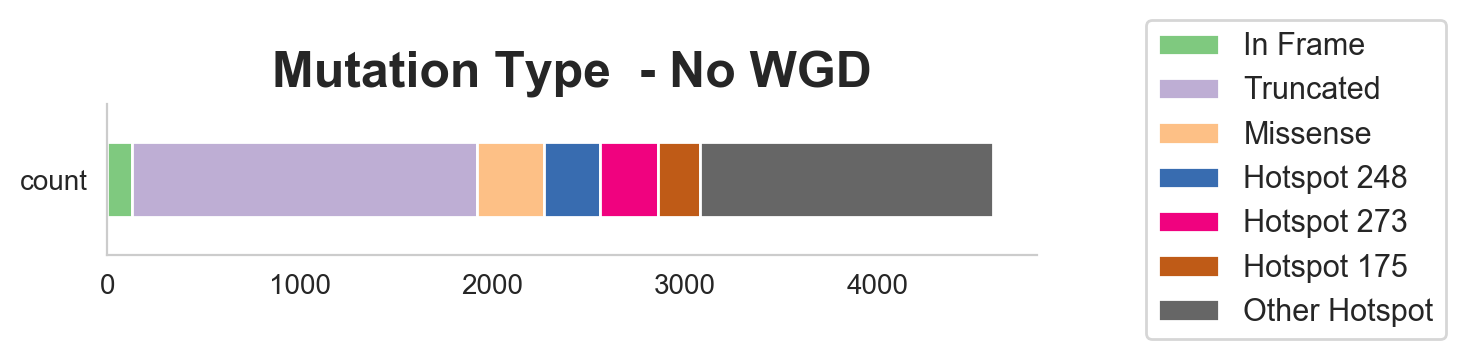

In [369]:
h = get_groupby(master,'tp53_vc_group_1', 'count').sort_values(by='count', ascending=False)
display(h)

h = h.T
h = h[['in_frame', 'missense', 'hotspot', '248', '273', '175','truncated']]
fig = plt.figure(figsize=(6,1))
ax = plt.subplot()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

h_plot = h.plot(kind = 'barh', stacked=True, yticks=[], ax=ax, colormap="Accent")
ax.legend(['In Frame','Truncated', 'Missense', 'Hotspot 248','Hotspot 273','Hotspot 175', 'Other Hotspot'],loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=11)
ax.set_title('Mutation Type  - No WGD'.format(cancer), weight='bold', fontsize=18)

plt.show()

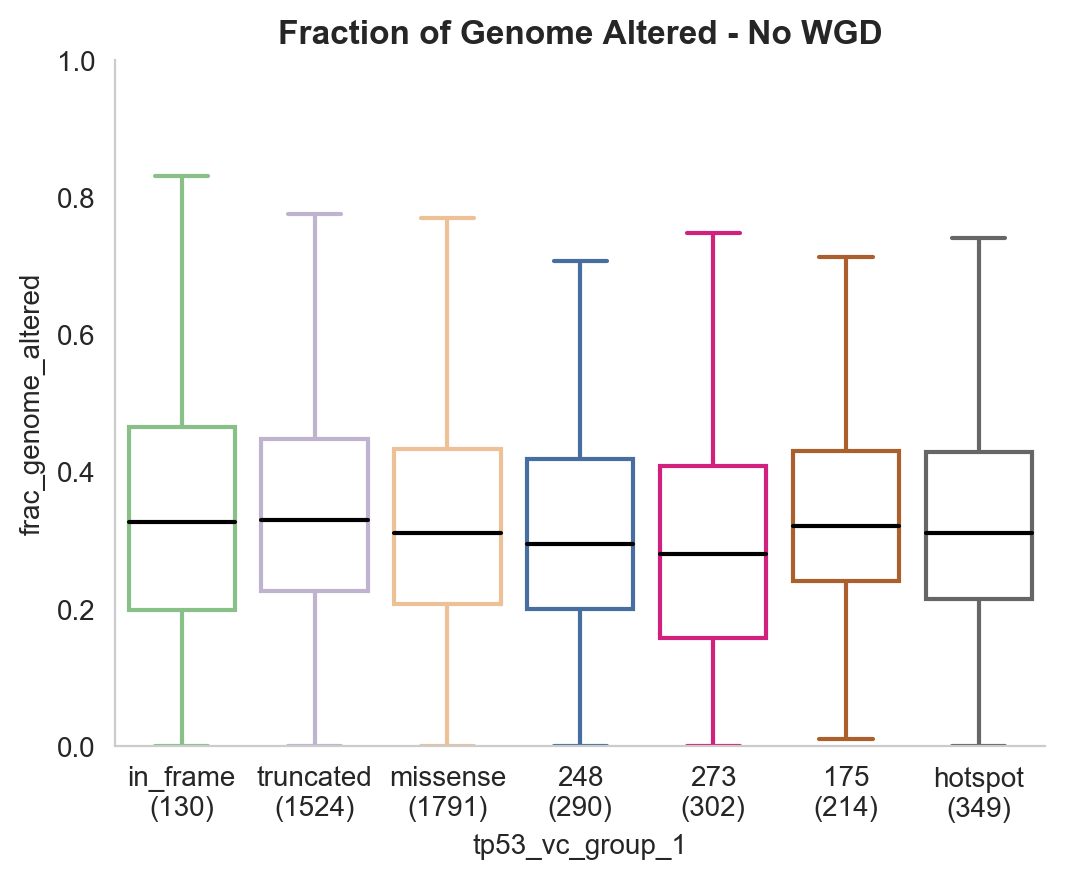

,0,1,2
0,,size,frac_genome_altered
1,248,290,0.294
2,273,302,0.28
3,,Statistics,p-value
4,,2.02849,0.0425101


In [436]:
mc = list(islice(cycle(list(sns.color_palette("muted"))), None, 6))

fig, ax = boxplot_sampletype(df=master,
                  group='tp53_vc_group_1',
                  palette=mutation_palette,
                  order=mutation_list,
                  metrics='frac_genome_altered',
                  figsize=(6,10),
                  title='Fraction of Genome Altered - No WGD',
                  xlim=[0,1])
plt.show()

display(get_statistics(df=master,
               group='tp53_vc_group_1',
               metrics='frac_genome_altered', 
               group_list=['248', '273']))

##  TP53 Residual Groups

In [432]:
print('Number of Bi Allelic samples (with 1 mut): ' + str(master[master['tp53_res_group'] == 'no_tp53_res'].shape[0]))
print('')
print('Number of  TP53 Residual samples (with 1 mut): ' + str(master[master['tp53_res_group'] == 'tp53_res'].shape[0]))

Number of Bi Allelic samples (with 1 mut): 3935

Number of  TP53 Residual samples (with 1 mut): 496


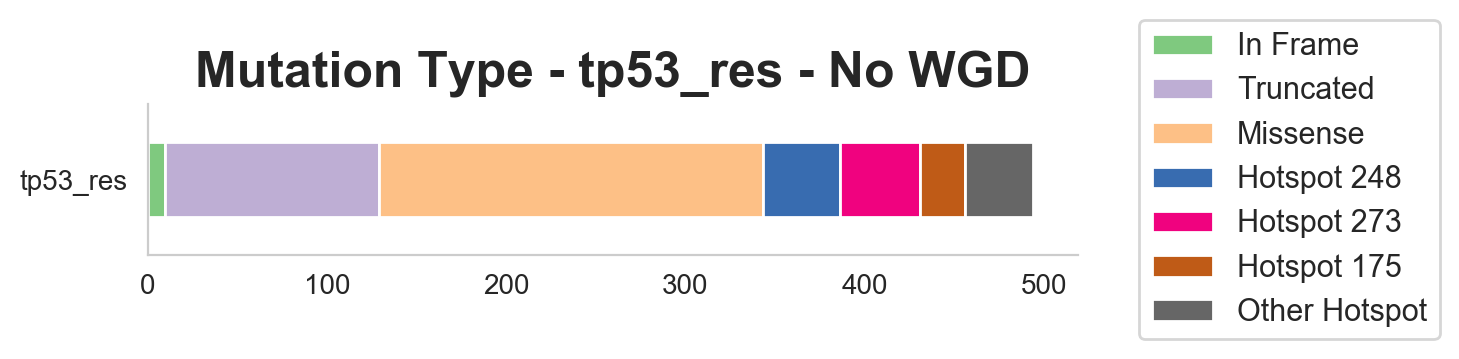

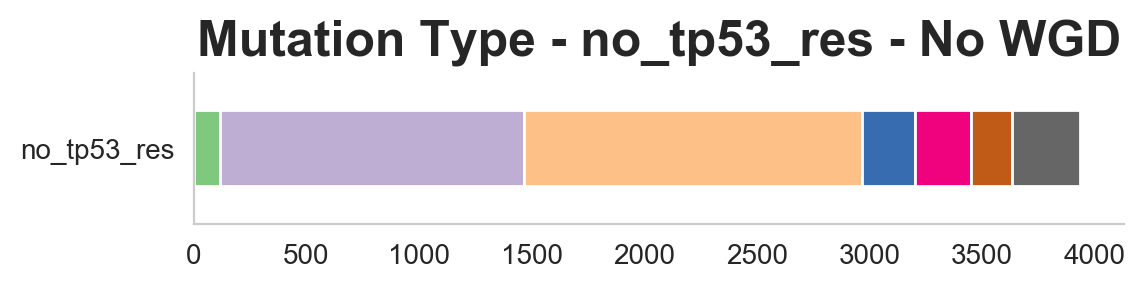

,tp53_res
tp53_vc_group_1,
missense,214
truncated,119
273,45
248,43
hotspot,38
175,25
in_frame,10
,no_tp53_res
tp53_vc_group_1,


In [435]:
total_df = []
for group in ['tp53_res', 'no_tp53_res']:
    h = get_groupby(master[master['tp53_res_group'] == group], 'tp53_vc_group_1', group).sort_values(by=group, ascending=False)
    total_df.append(h)
    
    h = h.T
    h = h[mutation_list]
    fig = plt.figure(figsize=(6,1))
    ax = plt.subplot()

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    h_plot = h.plot(kind = 'barh', stacked=True, yticks=[], ax=ax, colormap="Accent")
    if group == 'tp53_res':
        ax.legend(['In Frame', 'Truncated', 'Missense', 'Hotspot 248','Hotspot 273','Hotspot 175', 'Other Hotspot'],loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=11)
    else: ax.get_legend().remove()
    ax.set_title('Mutation Type - {} - No WGD'.format(group), weight='bold', fontsize=18)

    plt.show()

display_side_by_side(total_df[0],total_df[1])

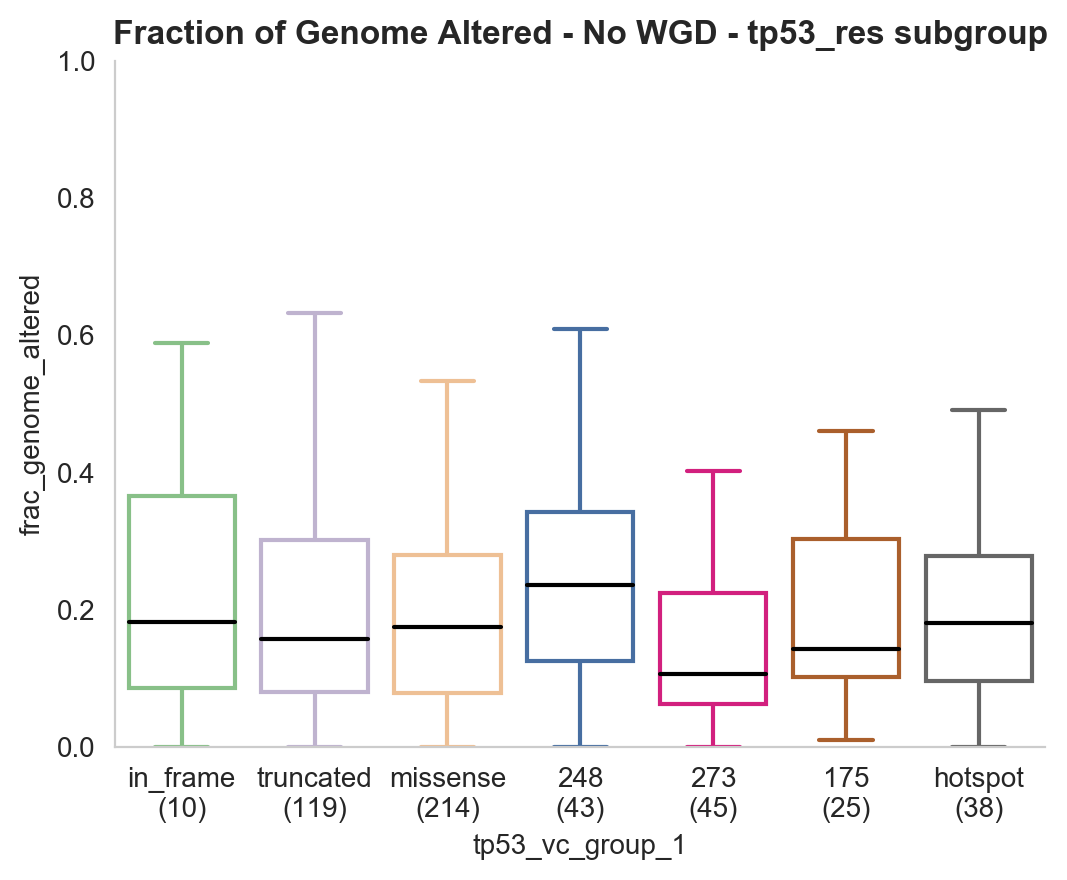

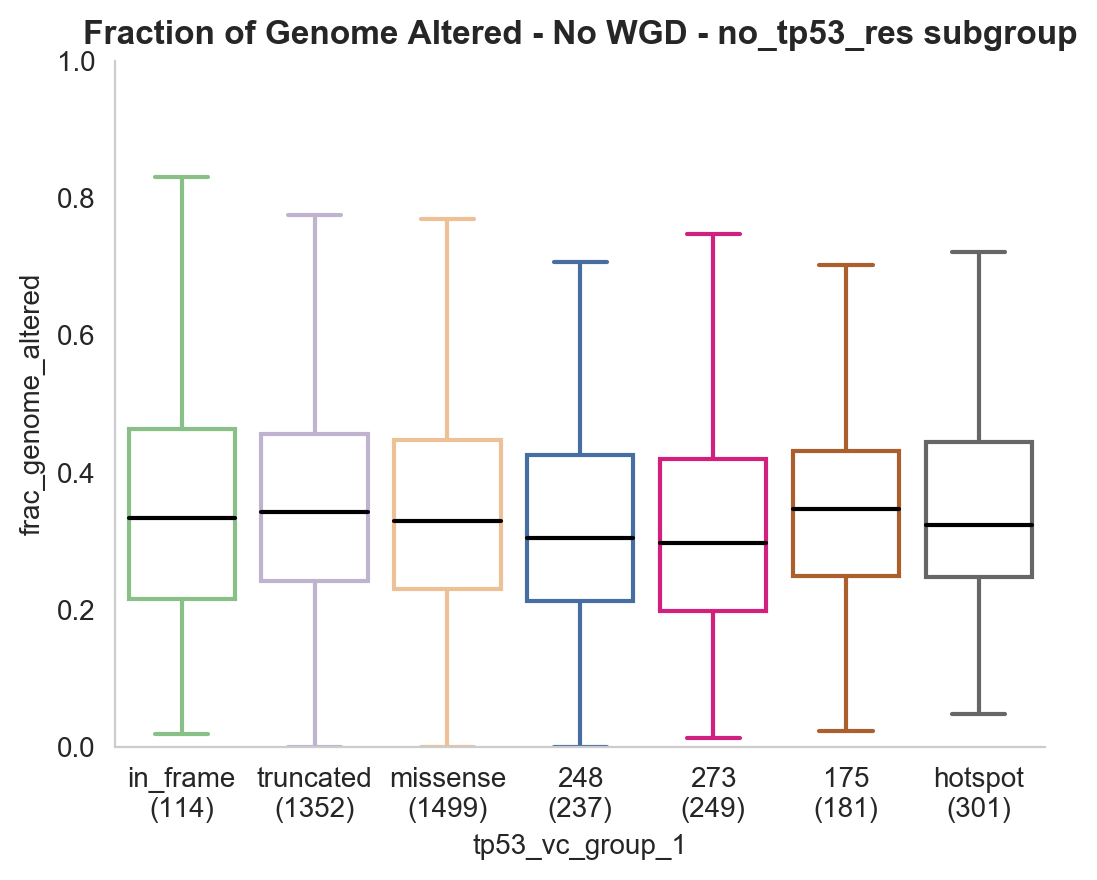

In [437]:
for group in ['tp53_res', 'no_tp53_res']:
    master_wt = master[master['tp53_res_group'] == group]

    fig, ax = boxplot_sampletype(df=master_wt,
                      group='tp53_vc_group_1',
                      palette=mutation_palette,
                      order=mutation_list,
                      metrics='frac_genome_altered',
                      figsize=(6,10),
                      title='Fraction of Genome Altered - No WGD - {} subgroup'.format(group),
                      xlim=[0,1])
    plt.show()

##  TP53 subgroups

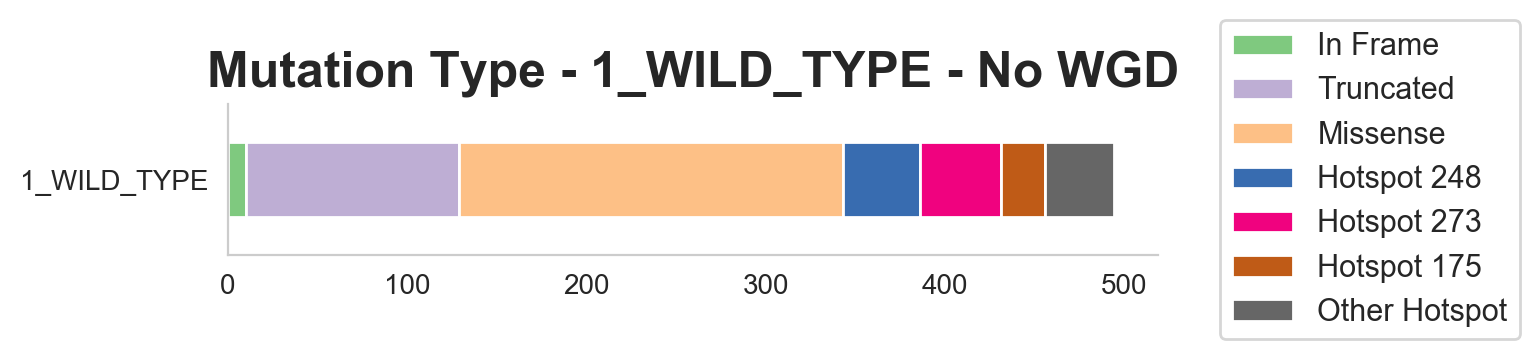

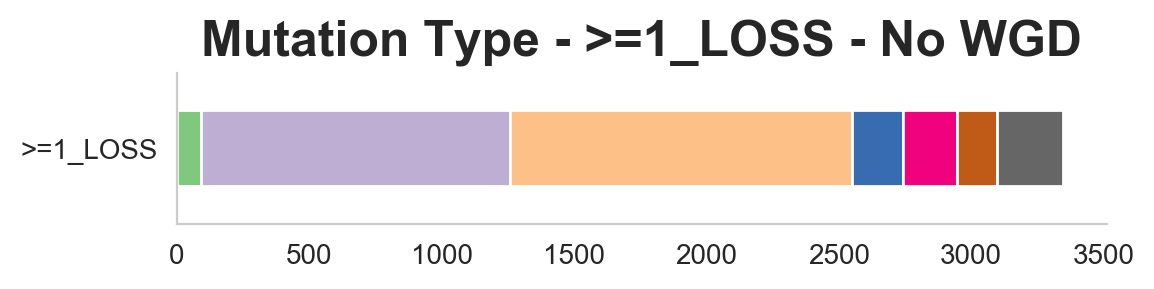

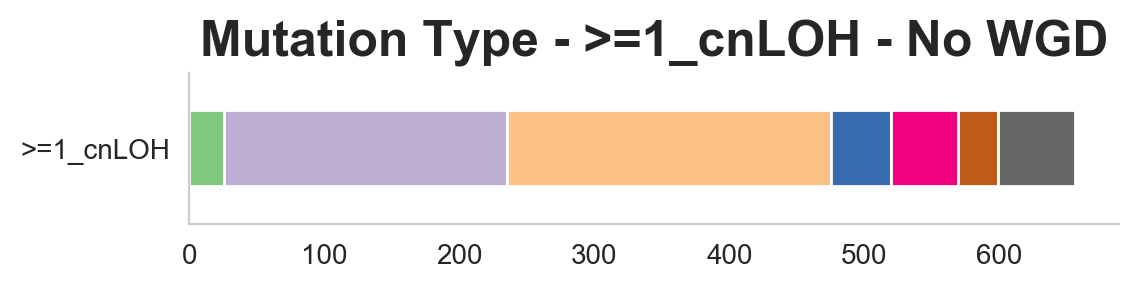

,1_WILD_TYPE
tp53_vc_group_1,
missense,214
truncated,119
273,45
248,43
hotspot,38
175,25
in_frame,10
,>=1_LOSS
tp53_vc_group_1,


In [386]:
total_df = []
for group in ['1_WILD_TYPE', '>=1_LOSS', '>=1_cnLOH']:
    h = get_groupby(master[master['tp53_group'] == group], 'tp53_vc_group_1', group).sort_values(by=group, ascending=False)
    total_df.append(h)
    
    h = h.T
    h = h[mutation_list]
    fig = plt.figure(figsize=(6,1))
    ax = plt.subplot()

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    h_plot = h.plot(kind = 'barh', stacked=True, yticks=[], ax=ax, colormap="Accent")
    if group == '1_WILD_TYPE':
        ax.legend(['In Frame', 'Truncated', 'Missense', 'Hotspot 248','Hotspot 273','Hotspot 175', 'Other Hotspot'],loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=11)
    else: ax.get_legend().remove()
    ax.set_title('Mutation Type - {} - No WGD'.format(group), weight='bold', fontsize=18)

    plt.show()

display_side_by_side(total_df[0],total_df[1],total_df[2])

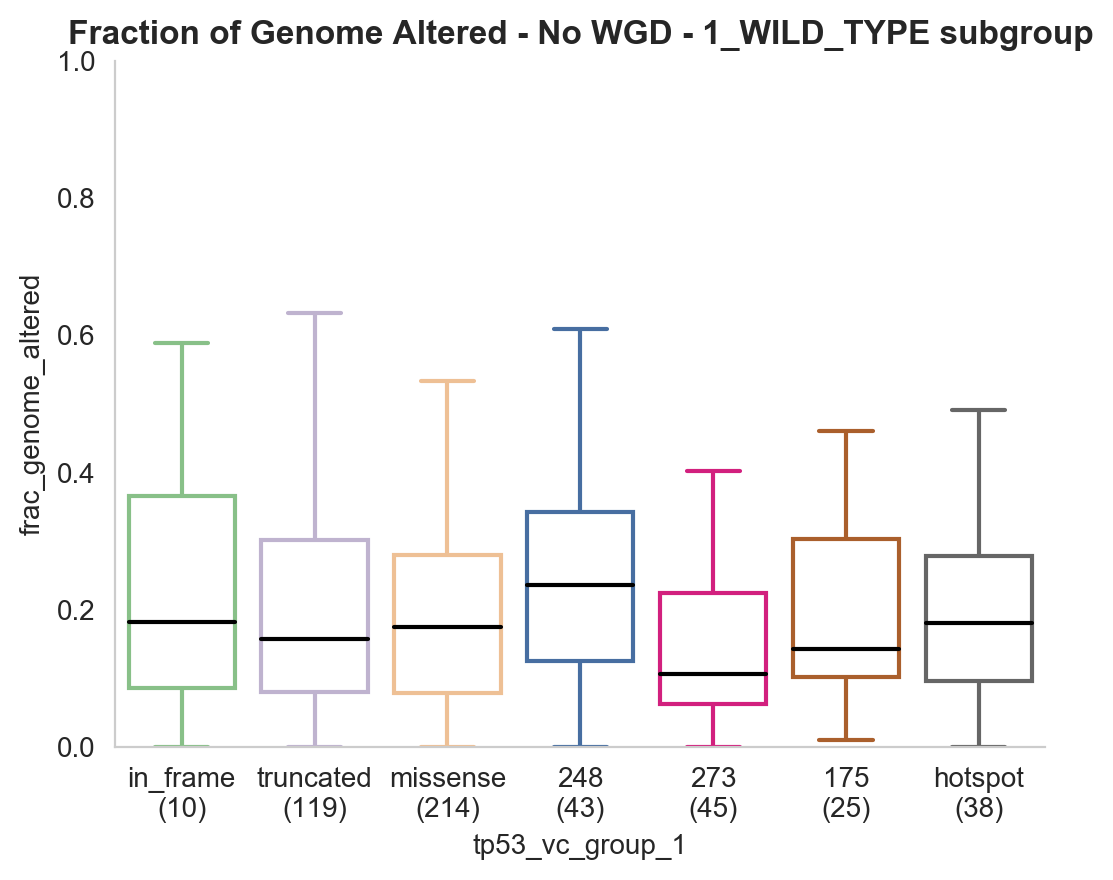

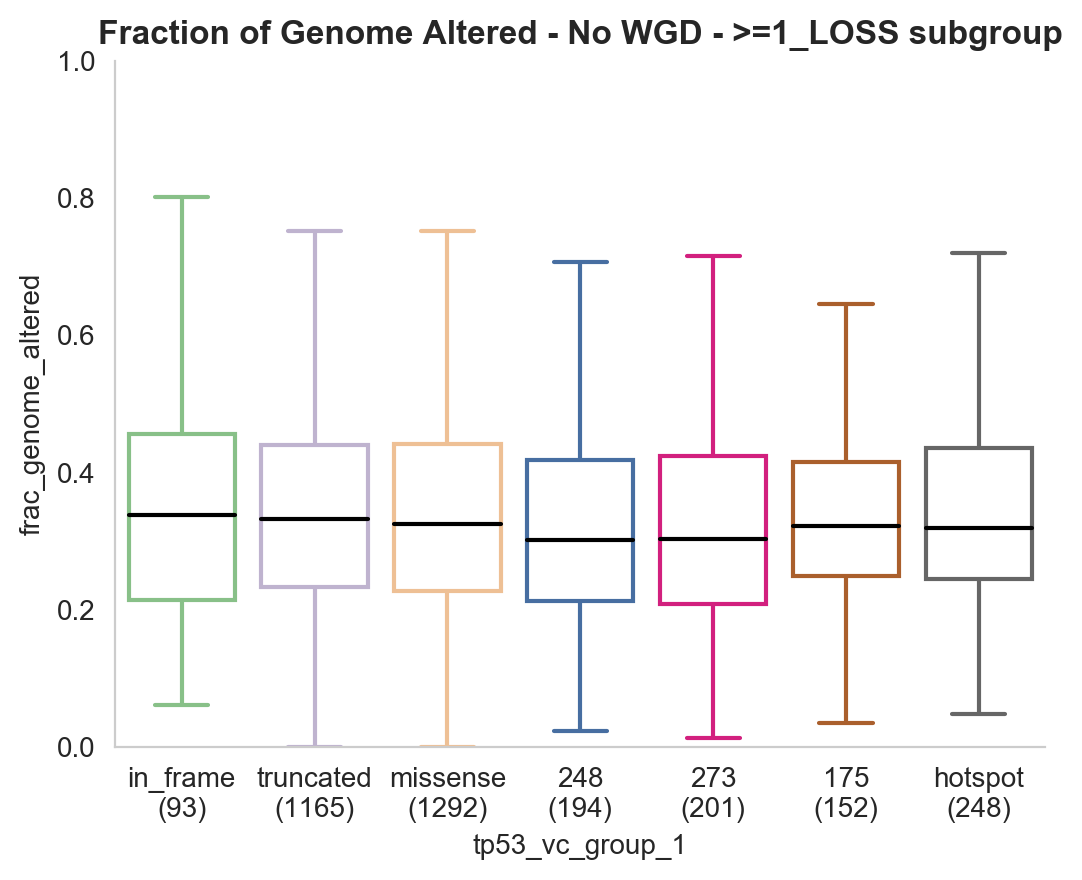

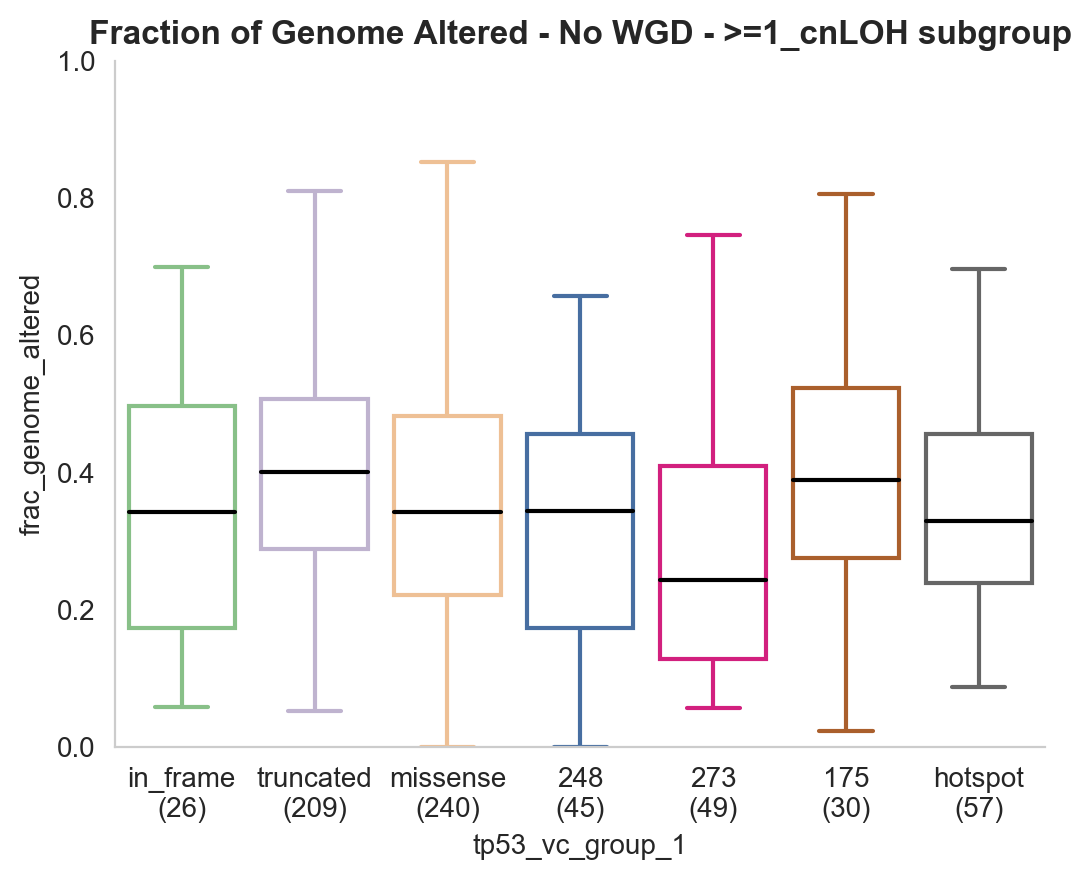

In [438]:
for group in ['1_WILD_TYPE', '>=1_LOSS', '>=1_cnLOH']:
    master_wt = master[master['tp53_group'] == group]

    fig, ax = boxplot_sampletype(df=master_wt,
                      group='tp53_vc_group_1',
                      palette=mutation_palette,
                      order=mutation_list,
                      metrics='frac_genome_altered',
                      figsize=(6,10),
                      title='Fraction of Genome Altered - No WGD - {} subgroup'.format(group),
                      xlim=[0,1])
    plt.show()

## Pan cancer plot

In [142]:
# Filter and order the samples in order to plot with decreasing medians on the cnloh subgroup
cancer_count = get_groupby(master[~master['tp53_group'].isna()], 'Cancer_Type', 'count').sort_values(by='count', ascending = False)
cancer_list = list(cancer_count[cancer_count['count']>=100].index.values)
master_list = master[master['Cancer_Type'].isin(cancer_list)]
cancer_count_ = get_groupby(master_list[~master_list['tp53_group'].isna()], 'Cancer_Type', 'count').sort_values(by='count', ascending = False)

cancer_order = cancer_count_.index.tolist()
samples_list_ordered=[]
for cancer in cancer_order:
    samples_list_ordered = samples_list_ordered + master_list[master_list['Cancer_Type'] == cancer].index.tolist()
#samples_list_ordered

master_ordered = master_list.reindex(samples_list_ordered)

CPU times: user 36.8 s, sys: 3.26 s, total: 40 s
Wall time: 13.5 s


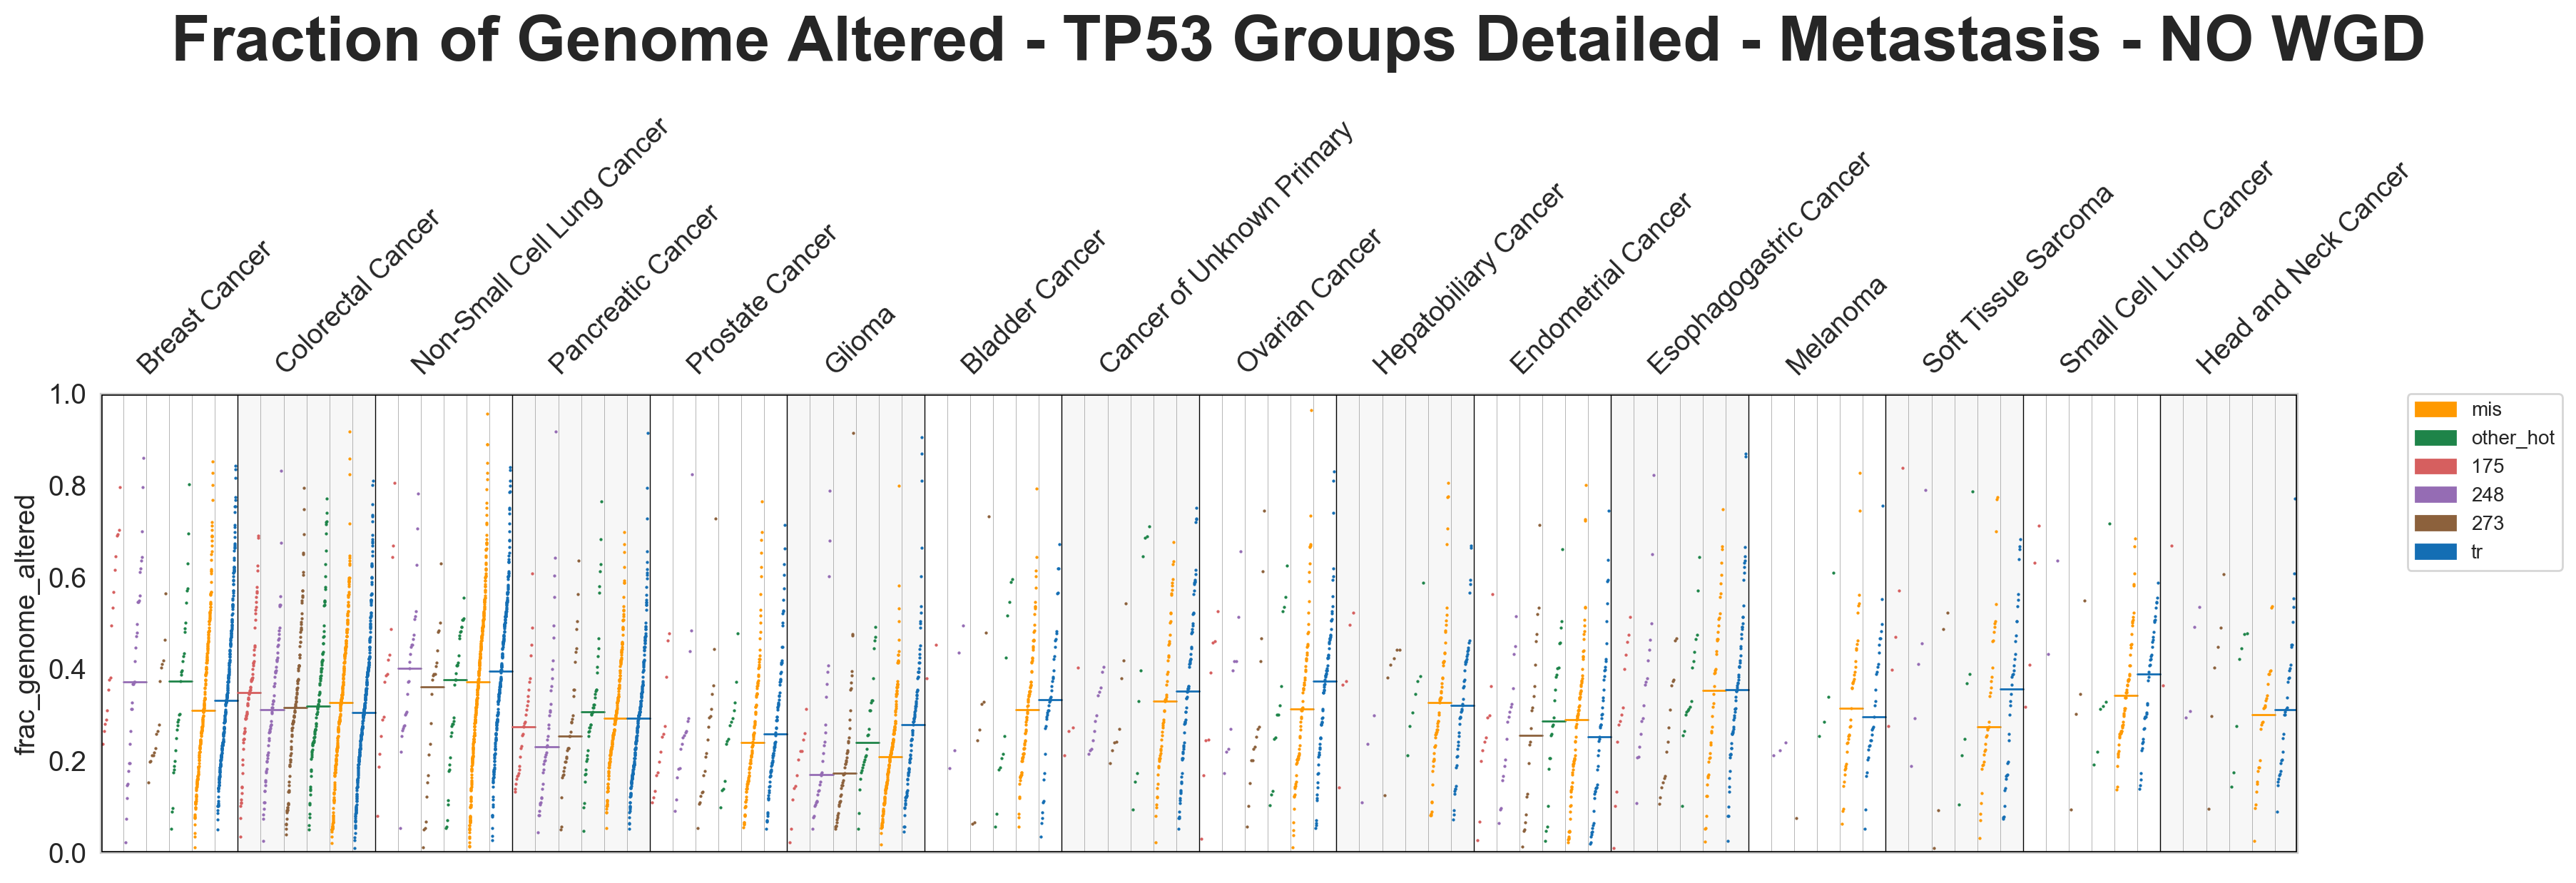

In [151]:
%%time
# Let's begin with. one subgroup : >=1_cnLOH
sns.set_style("whitegrid", {'grid.color': '1.'})

palette_hotspots = {'mis': '#FF9900', 'other_hot': '#1E8449',  '175':mc[3], '248':mc[4], '273':mc[5], 'tr': '#146EB4'}
metrics='frac_genome_altered'
ylim=1

fig = plt.figure(figsize=(20,7))
ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)

import itertools
col = itertools.cycle(["#FFFFFF","#FFFFFF","#FFFFFF","#FFFFFF","#FFFFFF","#FFFFFF", "#F7F7F7", "#F7F7F7","#F7F7F7","#F7F7F7","#F7F7F7","#F7F7F7"])
labels = []

#order = medians.sort_values(ascending=False)
for i, (group, df) in enumerate(master_ordered.groupby(by="Cancer_Type", sort=False)):
    i = 6*i
    labels.append(group)
    
    # 1_WILD_TYPE Subgroup in GREEN
    
    df_mono = df[df['hot_group_3'] =='175']
    totalsamples_mono = df_mono.shape[0]
    df_mono = df_mono.sort_values(metrics)
    plt.axvspan(xmin=i-0.5,xmax=i+0.5,color=next(col),zorder=1)
    if totalsamples_mono>0:
        for j,(_,row) in enumerate(df_mono.iterrows()):
            plt.scatter(i-0.4+(j/totalsamples_mono)*0.8,row[metrics],color=palette_hotspots['175'],s=0.3,zorder=2)
        
        if df_mono.shape[0]>20:
            median_mono  = df_mono[metrics].median()
            plt.plot([i-0.5,i+0.5],[median_mono,median_mono],color=palette_hotspots['175'], linewidth=1)
    #print(group, '1_WT')
    plt.plot([i+0.5,i+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    # 0_HETLOSS Subgroup in BROWN
    l=i+1
    df_mono = df[df['hot_group_3'] =='248']
    totalsamples_mono = df_mono.shape[0]
    df_mono = df_mono.sort_values(metrics)
    plt.axvspan(xmin=l-0.5,xmax=l+0.5,color=next(col),zorder=1)
    if totalsamples_mono>0:
        for j,(_,row) in enumerate(df_mono.iterrows()):
            plt.scatter(l-0.4+(j/totalsamples_mono)*0.8,row[metrics],color=palette_hotspots['248'],s=0.3,zorder=2)
        
        if df_mono.shape[0]>20:
            median_mono  = df_mono[metrics].median()
            plt.plot([l-0.5,l+0.5],[median_mono,median_mono],color=palette_hotspots['248'], linewidth=1)
    
    plt.plot([l+0.5,l+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    # >1muts Subgroup in RED
    k = i+2
    df_muts = df[df['hot_group_3'] =='273']
    totalsamples_muts = df_muts.shape[0]
    df_muts = df_muts.sort_values(metrics)
    plt.axvspan(xmin=k-0.5,xmax=k+0.5,color=next(col),zorder=1)
    if totalsamples_muts>0:
        for j,(_,row) in enumerate(df_muts.iterrows()):
            plt.scatter(k-0.4+(j/totalsamples_muts)*0.8,row[metrics],color=palette_hotspots['273'],s=0.3,zorder=2)
    
        if df_muts.shape[0]>20:
            median_muts  = df_muts[metrics].median()
            plt.plot([k-0.5,k+0.5],[median_muts,median_muts],color=palette_hotspots['273'], linewidth=1)
    
    plt.plot([k+0.5,k+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    # LOSS Subgroup in BLUE
    h = i+3
    df_loss = df[df['hot_group_3'] =='other_hot']
    totalsamples_loss = df_loss.shape[0]
    df_loss = df_loss.sort_values(metrics)
    plt.axvspan(xmin=h-0.5,xmax=h+0.5,color=next(col),zorder=1)
    if totalsamples_loss>0:
        for j,(_,row) in enumerate(df_loss.iterrows()):
            plt.scatter(h-0.4+(j/totalsamples_loss)*0.8,row[metrics],color=palette_hotspots['other_hot'],s=0.3,zorder=2)
        
        if df_loss.shape[0]>20:
            median_loss  = df_loss[metrics].median()
            plt.plot([h-0.5,h+0.5],[median_loss,median_loss],color=palette_hotspots['other_hot'], linewidth=1)
    
    plt.plot([h+0.5,h+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    # CNLOH Subgroup in PURPLE
    g = i+4
    df_cnloh = df[df['hot_group_3'] =='mis']
    totalsamples_cnloh = df_cnloh.shape[0]
    df_cnloh = df_cnloh.sort_values(metrics)
    plt.axvspan(xmin=g-0.5,xmax=g+0.5,color=next(col),zorder=1)
    if totalsamples_cnloh>0:
        for j,(_,row) in enumerate(df_cnloh.iterrows()):
            plt.scatter(g-0.4+(j/totalsamples_cnloh)*0.8,row[metrics],color=palette_hotspots['mis'],s=0.3,zorder=2)

        if df_cnloh.shape[0]>20:    
            median_cnloh  = df_cnloh[metrics].median()
            plt.plot([g-0.5,g+0.5],[median_cnloh,median_cnloh],color=palette_hotspots['mis'], linewidth=1)
    
    plt.plot([g+0.5,g+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    # CNLOH Subgroup in PURPLE
    p = i+5
    df_cnloh = df[df['hot_group_3'] =='tr']
    totalsamples_cnloh = df_cnloh.shape[0]
    df_cnloh = df_cnloh.sort_values(metrics)
    plt.axvspan(xmin=p-0.5,xmax=p+0.5,color=next(col),zorder=1)
    if totalsamples_cnloh>0:
        for j,(_,row) in enumerate(df_cnloh.iterrows()):
            plt.scatter(p-0.4+(j/totalsamples_cnloh)*0.8,row[metrics],color=palette_hotspots['tr'],s=0.3,zorder=2)

        if df_cnloh.shape[0]>20:    
            median_cnloh  = df_cnloh[metrics].median()
            plt.plot([p-0.5,p+0.5],[median_cnloh,median_cnloh],color=palette_hotspots['tr'], linewidth=1)
    
    plt.plot([p+0.5,p+0.5],[0,1],color='black', linewidth=0.5) ##7F7F7F
  
num_dis = len(master[master['Cancer_Type'].isin(cancer_list)]["Cancer_Type"].unique())*6
real_labels = ['']*num_dis
for i,label in enumerate(labels):
    real_labels[6*i + 1] = label
    

ax.xaxis.tick_top()
plt.xticks([k for k in range(num_dis)], real_labels, rotation=45, ha="left", fontsize=14)
ax.xaxis.set_ticks_position('none')
plt.xlim(-0.5,num_dis-0.5)
plt.ylim(0,ylim)
# Grid
'''plt.plot([-0.5,num_dis+0.5],[0.2,0.2],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.4,0.4],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.6,0.6],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.8,0.8],color="black", linewidth=0.5, linestyle=':')
'''

# Border lines
plt.plot([-0.5,num_dis-0.5],[0,0],color="black", linewidth=2, linestyle='-')
plt.plot([-0.5,num_dis-0.5],[1,1],color="black", linewidth=2, linestyle='-')
plt.plot([-0.5,-0.5],[0,1],color="black", linewidth=2, linestyle='-')
plt.plot([num_dis-0.5,num_dis-0.5],[0,1],color="black", linewidth=2, linestyle='-')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel("")
plt.ylabel(metrics, fontsize=14)

# Create legend handles manually
handles = [matplotlib.patches.Patch(color=palette_hotspots[x], label=x) for x in palette_hotspots.keys()]
# Create legend
ax.legend(handles=handles,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


fig.suptitle( 'Fraction of Genome Altered -  - Metastasis' + ' - NO WGD', fontsize=32,fontweight='bold')
fig.subplots_adjust(left=0.08, bottom=0.14, right=0.85, top=0.6, wspace=2, hspace=1)
#fig.savefig('./gi_pancancer/no_wgd/pancancer_frac_all_met_no_wgd.pdf' , format='pdf')


## Special Pan Cancer Plot
Here we plot the different subgroups ie (1_WILD_TYPE / 0_HETLOSS / >1muts / >=1_cnLOH / >=1_LOSS) but splitting 1_WILD_TYPE bteween different hotspots (1725 / 273 / 248 / other_hot / mis / tr).
As this makes a lot of columns per cancer type, we will only select main cancers:
* From Breast Cancer to Bladder Cancer + Ovarian Cancer + Endometrial Cancer + Head and Neck Cancer (10 Cancers)

In [244]:
cancer_count = get_groupby(master[~master['tp53_group'].isna()], 'Cancer_Type', 'count').sort_values(by='count', ascending = False)
cancer_list = list(cancer_count[cancer_count['count']>=100].index.values)
master_list = master[master['Cancer_Type'].isin(cancer_list)]

order = ['Breast Cancer', 'Colorectal Cancer', 'Non-Small Cell Lung Cancer', 'Pancreatic Cancer', 'Prostate Cancer',
        'Glioma', 'Bladder Cancer', 'Ovarian Cancer', 'Endometrial Cancer', 'Head and Neck Cancer']

samples_list_ordered=[]
for cancer in cancer_order:
    samples_list_ordered = samples_list_ordered + master_list[master_list['Cancer_Type'] == cancer].index.tolist()
#samples_list_ordered

master_ordered = master_list.reindex(samples_list_ordered)

# Specific Cancer

In [441]:
cancer = 'Colorectal Cancer'

In [442]:
master_cancer = master[master['Cancer_Type'] == cancer]

get_hotspot_frac(df=master_cancer,
                group_type=None,
                group=None)

,0,1,2
0,spot,#,frac
1,273,94,0.3135
2,175,71,0.35
3,248,62,0.306
4,282,48,0.32
5,nan,35,0.307
6,245,32,0.3265
7,213,23,0.304
8,196,21,0.315
9,342,16,0.265


## All samples

,count
tp53_vc_group_1,
missense,161
truncated,78
273,48
248,30
hotspot,26
in_frame,15
175,12


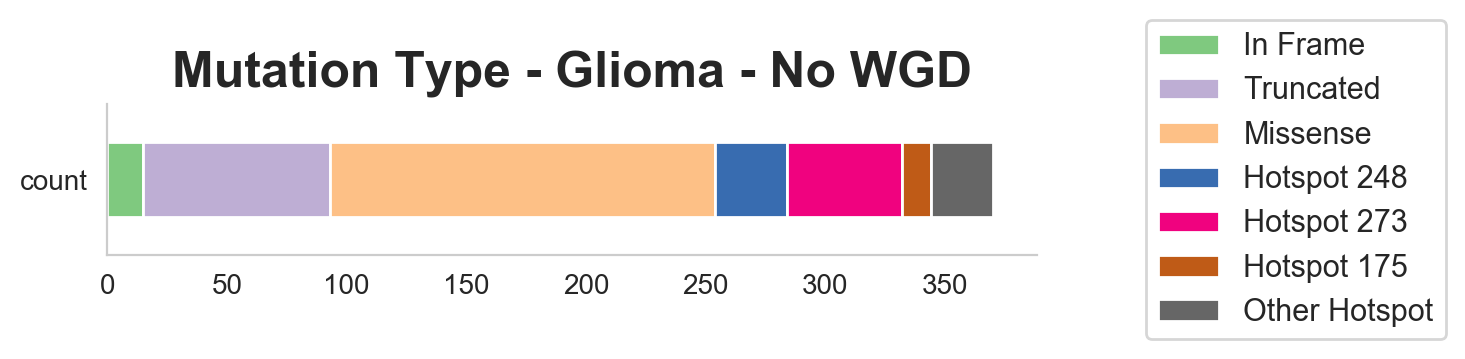

In [387]:
h = get_groupby(master_cancer,'tp53_vc_group_1', 'count').sort_values(by='count', ascending=False)
display(h)

h = h.T
h = h[mutation_list]
fig = plt.figure(figsize=(6,1))
ax = plt.subplot()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

h_plot = h.plot(kind = 'barh', stacked=True, yticks=[], ax=ax, colormap="Accent")
ax.legend(['In Frame', 'Truncated', 'Missense', 'Hotspot 248','Hotspot 273','Hotspot 175', 'Other Hotspot'],loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=11)
ax.set_title('Mutation Type - {} - No WGD'.format(cancer), weight='bold', fontsize=18)

plt.show()

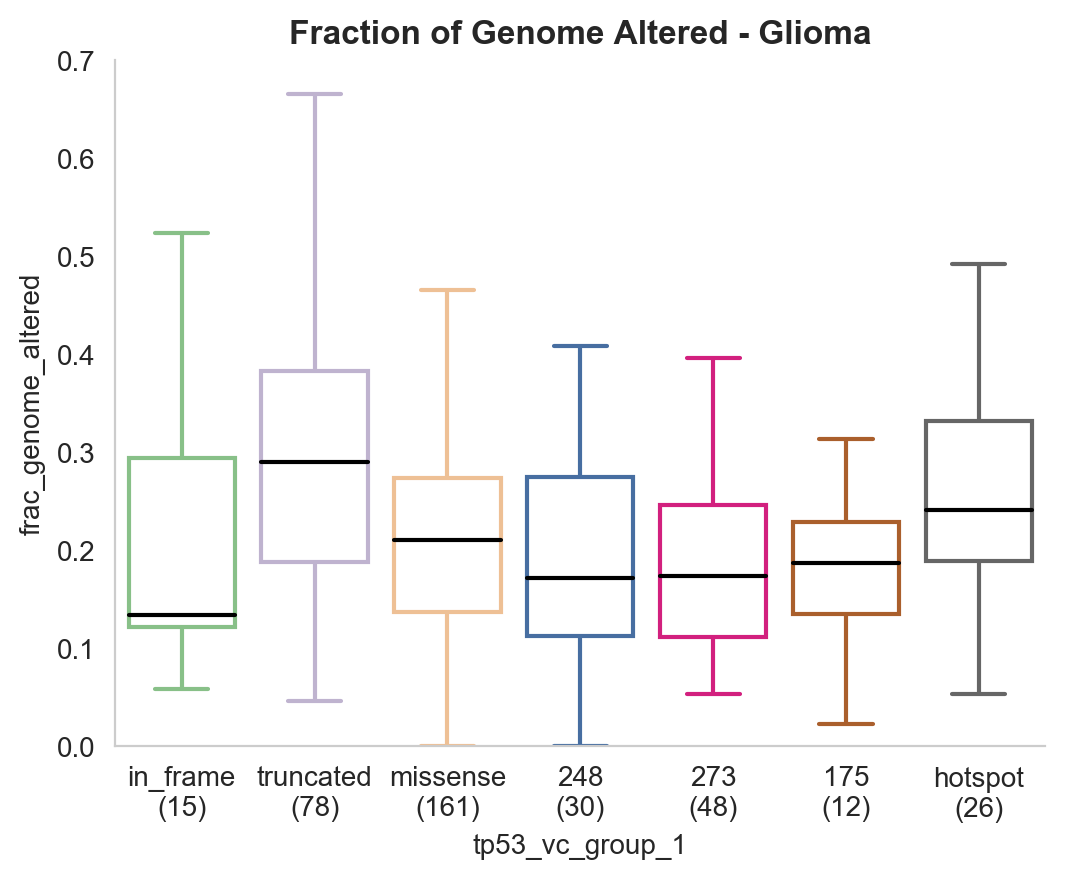

In [390]:
fig, ax = boxplot_sampletype(df=master_cancer,
                  group='tp53_vc_group_1',
                  palette=mutation_palette,
                  order=mutation_list,
                  metrics='frac_genome_altered',
                  figsize=(6,10),
                  title='Fraction of Genome Altered - {}'.format(cancer),
                  xlim=[0,0.7])
plt.show()

## Subgroups

In [286]:
get_groupby(master_cancer[master_cancer['tp53_group'] == '1_WILD_TYPE'], 'hot_group_3', group).sort_values(by=group, ascending=False)

,>=1_cnLOH
hot_group_3,
mis,11
tr,9
248,2
other_hot,1


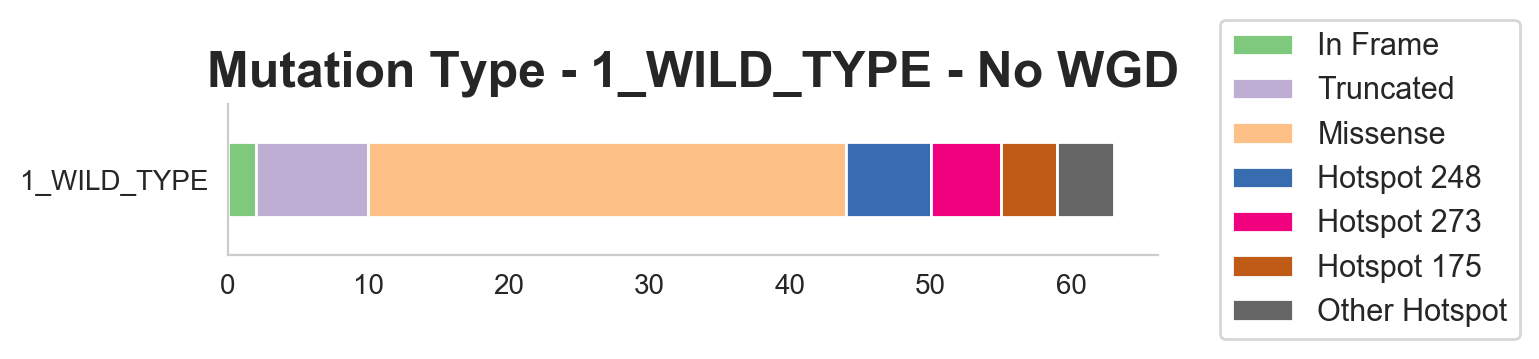

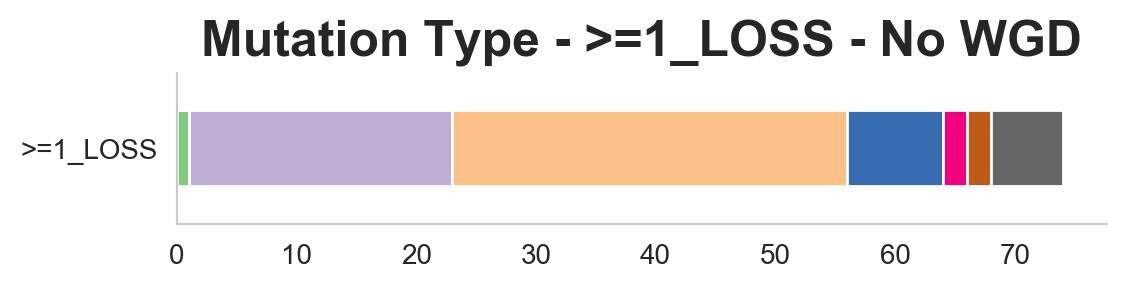

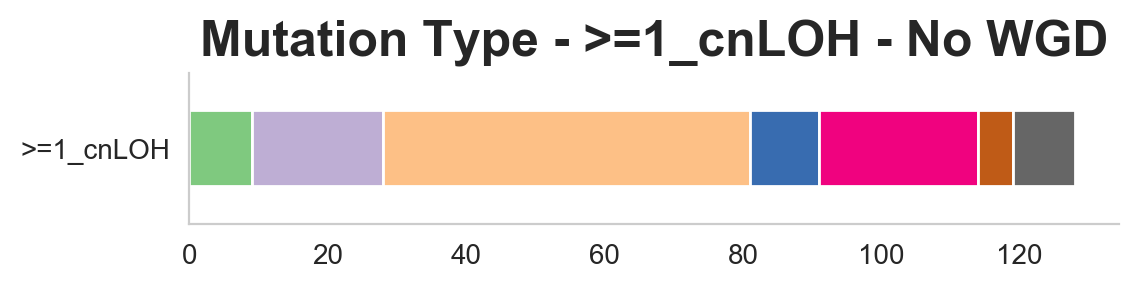

,1_WILD_TYPE
tp53_vc_group_1,
missense,34
truncated,8
248,6
273,5
175,4
hotspot,4
in_frame,2
,>=1_LOSS
tp53_vc_group_1,


In [397]:
total_df = []
for group in ['1_WILD_TYPE', '>=1_LOSS', '>=1_cnLOH']:
    h = get_groupby(master_cancer[master_cancer['tp53_group'] == group], 'tp53_vc_group_1', group).sort_values(by=group, ascending=False)
    total_df.append(h)
    
    h = h.T
    h = h[mutation_list]
    fig = plt.figure(figsize=(6,1))
    ax = plt.subplot()

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    h_plot = h.plot(kind = 'barh', stacked=True, yticks=[], ax=ax, colormap="Accent")
    if group == '1_WILD_TYPE':
        ax.legend(['In Frame', 'Truncated', 'Missense', 'Hotspot 248','Hotspot 273','Hotspot 175', 'Other Hotspot'],loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=11)
    else: ax.get_legend().remove()
    ax.set_title('Mutation Type - {} - No WGD'.format(group), weight='bold', fontsize=18)

    plt.show()

display_side_by_side(total_df[0],total_df[1],total_df[2])

We see a dichotomy between very unstable hotspots (175, 282, 135, 248) and very stable hotspots (273, 245, 213, 90)

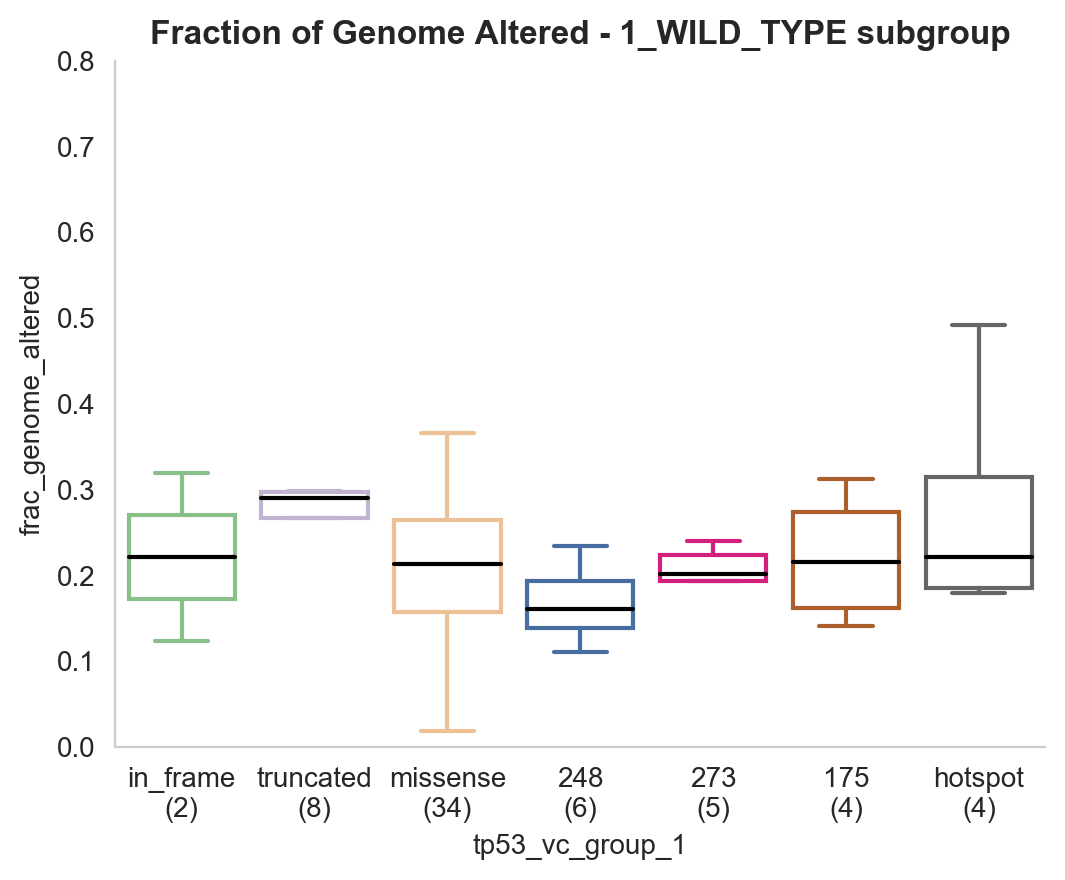

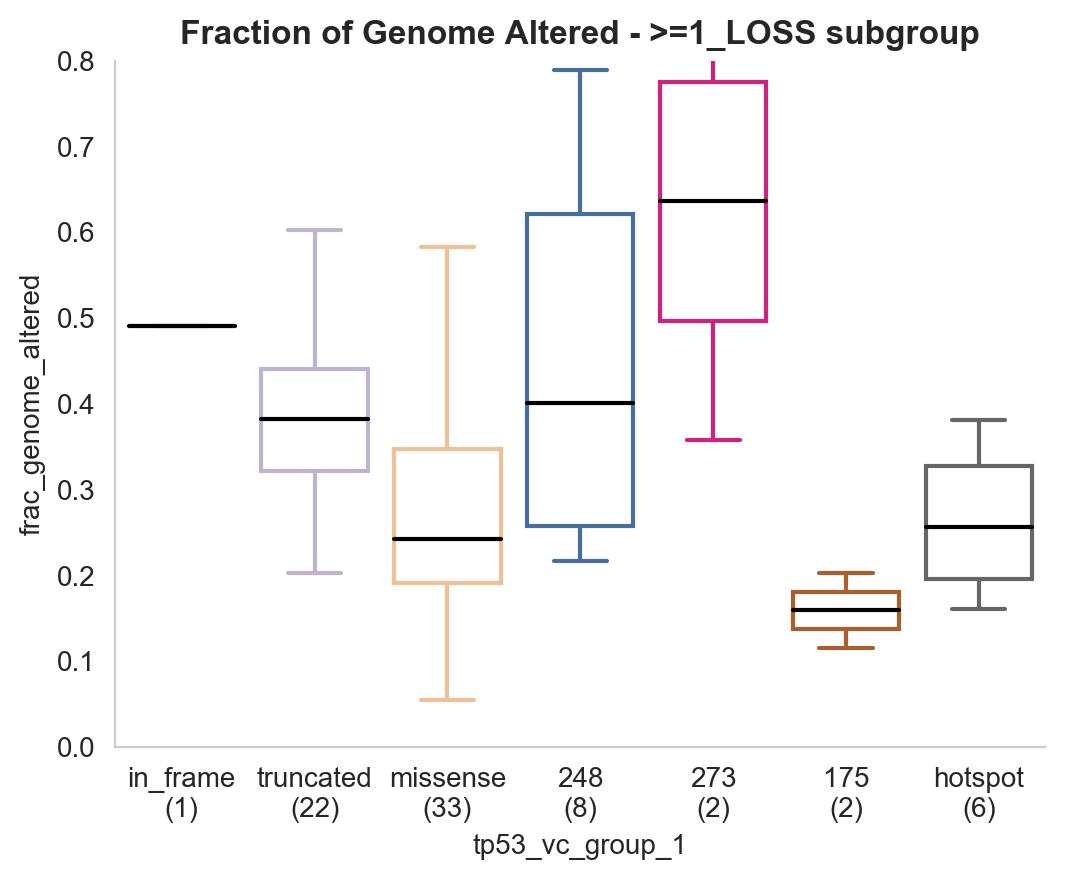

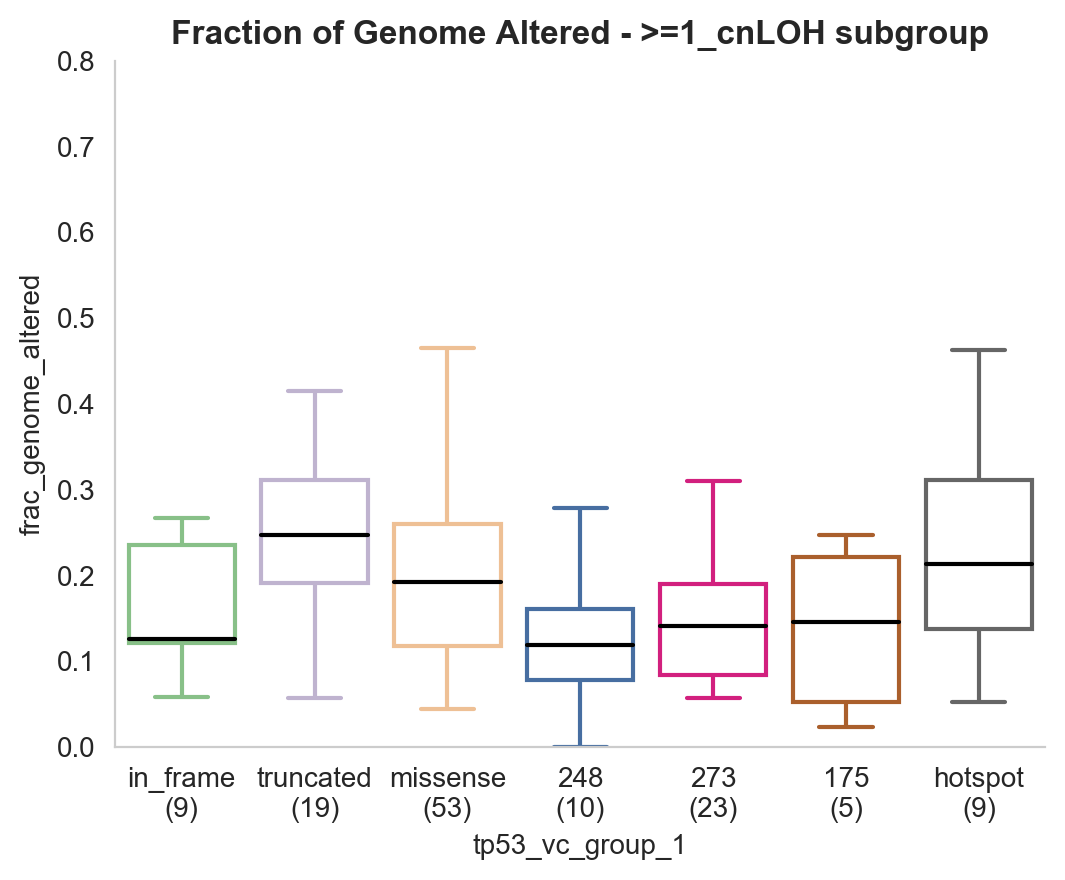

In [400]:
for group in ['1_WILD_TYPE', '>=1_LOSS', '>=1_cnLOH']:
    master_wt = master_cancer[master_cancer['tp53_group'] == group]

    fig, ax = boxplot_sampletype(df=master_wt,
                      group='tp53_vc_group_1',
                      palette=mutation_palette,
                      order=mutation_list,
                      metrics='frac_genome_altered',
                      figsize=(6,10),
                      title='Fraction of Genome Altered - {} subgroup'.format(group),
                      xlim=[0,0.8])
    plt.show()


What would be the new 1_WT median if we remove 273

# WGD Cohort - Hotspot Distribution

In [401]:
master_wgd = pd.read_pickle(data_path + 'impact-facets-tp53/processed/wgd/master_wgd.pkl')

# Same here, we only look at the samples with exactly 1 tp53 mutation
master_wgd = master_wgd[master_wgd['tp53_count'] == 1]

## Overall distribution

For all the cohort, here is :
* the hotspot/mutation type distribution
* the hotspots / GI associated

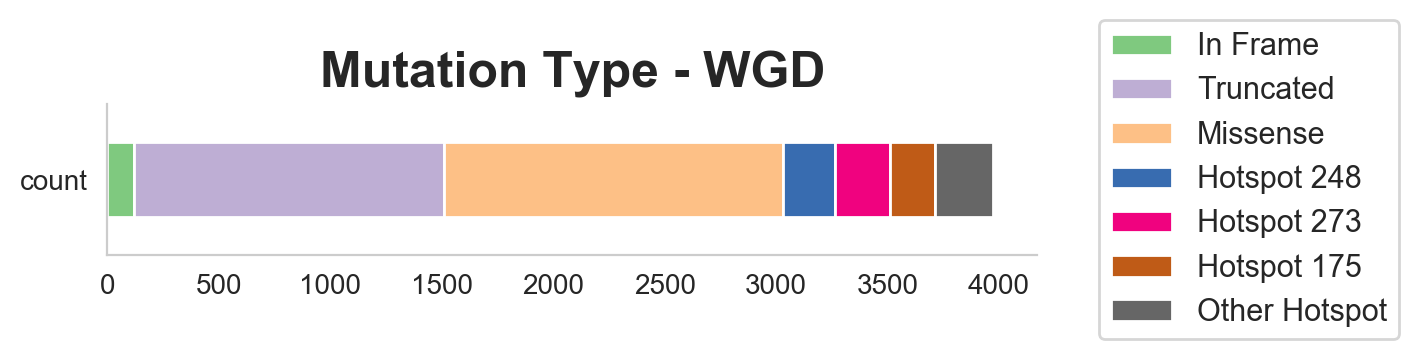

,count
tp53_vc_group_1,
missense,1520
truncated,1390
hotspot,261
273,246
248,235
175,200
in_frame,121


In [418]:
h =get_groupby(master_wgd, 'tp53_vc_group_1', 'count').sort_values(by='count', ascending=False)
h = h.T
h = h[mutation_list]
fig = plt.figure(figsize=(6,1))
ax = plt.subplot()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

h_plot = h.plot(kind = 'barh', stacked=True, yticks=[], ax=ax, colormap="Accent")
ax.legend(['In Frame', 'Truncated', 'Missense', 'Hotspot 248','Hotspot 273','Hotspot 175', 'Other Hotspot'],loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=11)
ax.set_title('Mutation Type - WGD'.format(group), weight='bold', fontsize=18)

plt.show()

display(h.T.sort_values(by='count', ascending = False))

In [404]:
get_hotspot_frac(df=master_wgd,
                group_type=None,
                group=None,
                nb=10)

,0,1,2
0,spot,#,frac
1,nan,303,0.873
2,273,247,0.868
3,248,238,0.8885
4,175,201,0.876
5,213,109,0.884
6,245,98,0.854
7,282,92,0.867
8,220,63,0.872
9,342,62,0.888


All associated with very high Genome Instability

## Different subcohort distributions

### 1 mut + LOH

In [405]:
master_mut_loh = master_wgd[master_wgd['tp53_count'] == 1][master_wgd['tp53_loh_status'] == True]
print('Number of tp53 mutated and LOH samples: ' + str(master_mut_loh.shape[0]))

Number of tp53 mutated and LOH samples: 3738


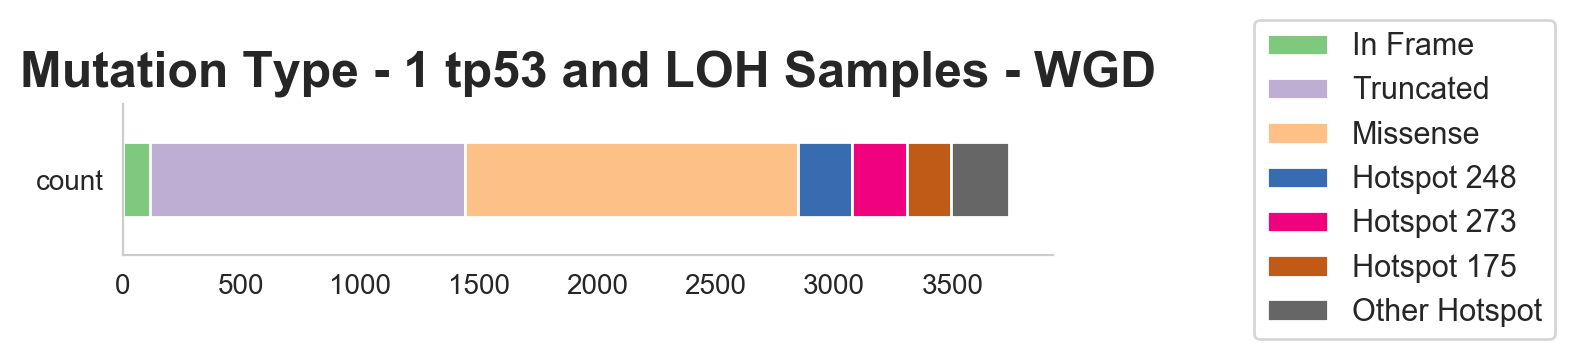

,count
tp53_vc_group_1,
missense,1408
truncated,1326
hotspot,244
273,231
248,227
175,187
in_frame,115


In [421]:
h = get_groupby(master_mut_loh, 'tp53_vc_group_1', 'count').sort_values(by='count', ascending=False)

h = h.T
h = h[mutation_list]
fig = plt.figure(figsize=(6,1))
ax = plt.subplot()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

h_plot = h.plot(kind = 'barh', stacked=True, yticks=[], ax=ax, colormap="Accent")
ax.legend(['In Frame', 'Truncated', 'Missense', 'Hotspot 248','Hotspot 273','Hotspot 175', 'Other Hotspot'],loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=11)
ax.set_title('Mutation Type - 1 tp53 and LOH Samples - WGD', weight='bold', fontsize=18)

plt.show()

display(h.T.sort_values(by='count', ascending = False))

In [408]:
get_hotspot_frac(df=master_mut_loh,
                group_type=None,
                group=None,
                nb=10)

,0,1,2
0,spot,#,frac
1,nan,290,0.8725
2,273,232,0.879
3,248,230,0.8905
4,175,188,0.8755
5,213,103,0.886
6,282,89,0.865
7,245,89,0.847
8,342,60,0.886
9,220,59,0.872


### 1 mut + No LOH

In [409]:
master_mut_noloh = master_wgd[master_wgd['tp53_count'] == 1][master_wgd['tp53_loh_status'] == False]
print('Number of tp53 mutated and No LOH samples: ' + str(master_mut_noloh.shape[0]))

Number of tp53 mutated and No LOH samples: 235


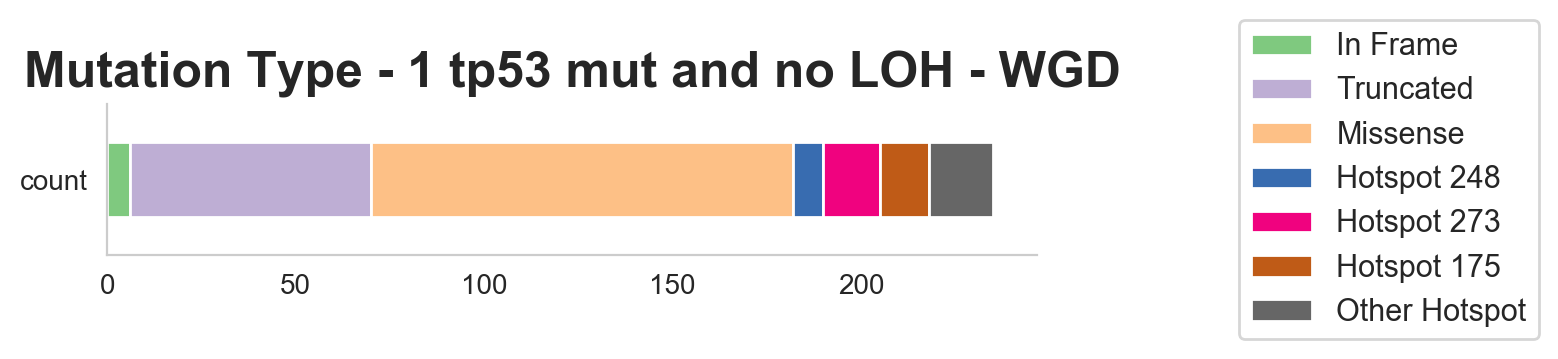

,count
tp53_vc_group_1,
missense,112
truncated,64
hotspot,17
273,15
175,13
248,8
in_frame,6


In [423]:
h = get_groupby(master_mut_noloh, 'tp53_vc_group_1', 'count').sort_values(by='count', ascending=False)

h = h.T
h = h[mutation_list]
fig = plt.figure(figsize=(6,1))
ax = plt.subplot()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

h_plot = h.plot(kind = 'barh', stacked=True, yticks=[], ax=ax, colormap="Accent")
ax.legend(['In Frame', 'Truncated', 'Missense', 'Hotspot 248','Hotspot 273','Hotspot 175', 'Other Hotspot'],loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=11)
ax.set_title('Mutation Type - 1 tp53 mut and no LOH - WGD', weight='bold', fontsize=18)

plt.show()

display(h.T.sort_values(by='count', ascending = False))

In [229]:
get_hotspot_frac(df=master_mut_noloh,
                group_type=None,
                group=None,
                nb=10)

,0,1,2
0,spot,#,frac
1,273,15,0.8
2,nan,13,0.914
3,175,13,0.882
4,245,9,0.859
5,248,8,0.837
6,213,6,0.8645
7,135,5,0.931
8,220,4,0.858
9,179,4,0.858


### Pre WGD TP53 Bi Allelic State

In [232]:
master_bi = master_wgd[master_wgd['prewgd_tp53_group_2'] == 'bi']
print('Number of Pre WGD TP53 Bi Allelic State samples: ' + str(master_bi.shape[0]))

Number of Pre WGD TP53 Bi Allelic State samples: 3289


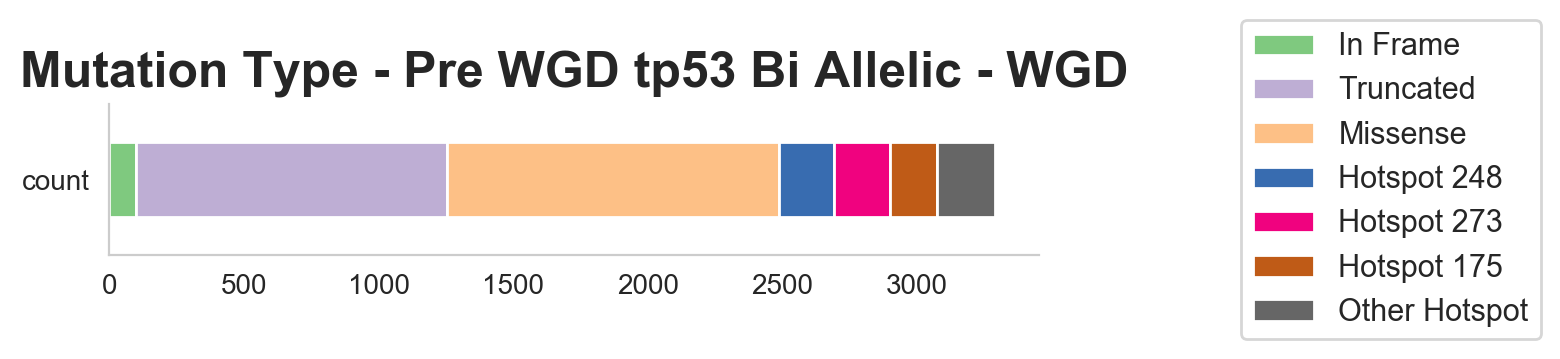

,count
tp53_vc_group_1,
missense,1233
truncated,1157
hotspot,217
273,210
248,202
175,172
in_frame,98


In [427]:
h = get_groupby(master_bi, 'tp53_vc_group_1', 'count').sort_values(by='count', ascending=False)

h = h.T
h = h[mutation_list]
fig = plt.figure(figsize=(6,1))
ax = plt.subplot()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

h_plot = h.plot(kind = 'barh', stacked=True, yticks=[], ax=ax, colormap="Accent")
ax.legend(['In Frame', 'Truncated', 'Missense', 'Hotspot 248','Hotspot 273','Hotspot 175', 'Other Hotspot'],loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=11)
ax.set_title('Mutation Type - Pre WGD tp53 Bi Allelic - WGD', weight='bold', fontsize=18)

plt.show()

display(h.T.sort_values(by='count', ascending = False))

In [234]:
get_hotspot_frac(df=master_bi,
                group_type=None,
                group=None,
                nb=10)

,0,1,2
0,spot,#,frac
1,nan,251,0.87
2,273,211,0.88
3,248,205,0.893
4,175,173,0.876
5,213,99,0.884
6,282,84,0.8645
7,245,73,0.832
8,342,55,0.89
9,220,52,0.868


### Pre WGD TP53 residual Allelic State

In [238]:
master_res = master_wgd[master_wgd['prewgd_tp53_group_1'] == 'tp53_res']
print('Number of Pre WGD TP53 residual Allelic State samples: ' + str(master_res.shape[0]))

Number of Pre WGD TP53 residual Allelic State samples: 2808


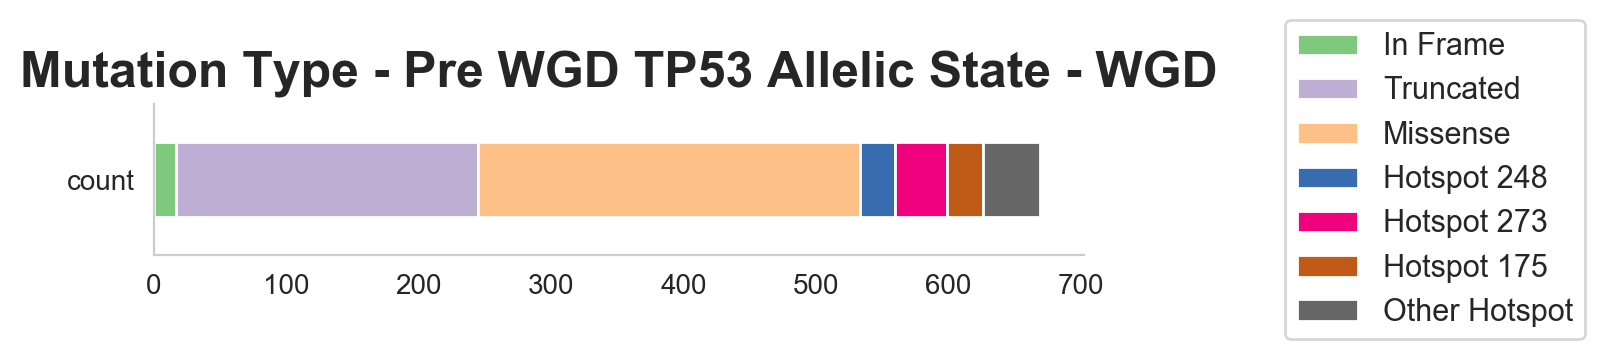

,count
tp53_vc_group_1,
missense,288
truncated,228
hotspot,43
273,39
248,27
175,27
in_frame,17


In [428]:
h = get_groupby(master_res, 'tp53_vc_group_1', 'count').sort_values(by='count', ascending=False)

h = h.T
h = h[mutation_list]
fig = plt.figure(figsize=(6,1))
ax = plt.subplot()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

h_plot = h.plot(kind = 'barh', stacked=True, yticks=[], ax=ax, colormap="Accent")
ax.legend(['In Frame', 'Truncated', 'Missense', 'Hotspot 248','Hotspot 273','Hotspot 175', 'Other Hotspot'],loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=11)
ax.set_title('Mutation Type - Pre WGD TP53 Allelic State - WGD'.format(group), weight='bold', fontsize=18)

plt.show()

display(h.T.sort_values(by='count', ascending = False))

In [240]:
get_hotspot_frac(df=master_res,
                group_type=None,
                group=None,
                nb=10)

,0,1,2
0,spot,#,frac
1,nan,45,0.902
2,273,39,0.839
3,175,28,0.8665
4,248,27,0.87
5,245,23,0.861
6,213,14,0.8435
7,135,12,0.9165
8,179,12,0.851
9,342,12,0.762
